# Defining the Question

### a) Specifying the Question

We have been appointed as the Lead Data Analysts to build a predictive model to determine if a building will have an insurance claim during a certain period or not.

We are also expected to deploy our model.

### b) Understanding the context 

An insurance company provides an insurance coverage for risks or liability for an indivisual or entity by way of insurance services. Building covers vary slightly between insurers, it generally covers damage caused to an insured property from a wide variety of events including fire, flooding , storm, impact (such as by a car or falling tree), explosion, riot, vandalism and earthquake. It is very crucial for an insurance company to identify whether  abuilding will have a claim or not. Our team of expert data scientists will build a model that will solve this problem for Boseman company.

### c) Defining the Metric for Success

Success will have been achieved when our model is able to make a prediction on a building's claim at the deployment stage.

### d) Recording the Experimental Design

1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning
5. Performing EDA
6. Modelling
7. Evaluation of the solution
8. Challenging the solution 
9. Conclusion

### e) Data Relevance

The data provided is relevant to the best of our domain knowledge. This is because it contains information about buildings in nigeria and all theother factors that may influence its insurance claim. 

At the data preparation stage, we shall further prove its relevance by carrying out investgative checking of data such as looking for null values, duplicates and even drop irrelevant columns. The final data will be accurate and relevant for analysis and modeling.

# Data Preparation

### Import Libraries

In [ ]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# set off the warnings that may appear
import warnings
warnings.filterwarnings(action='ignore') 

### Loading and Previewing our Dataset

#### Train dataset

In [ ]:
# Loading the Dataset from the source i.e. csv
# 
train=pd.read_csv('/content/train_data.csv')
train

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0


#### Test dataset

In [ ]:
# Loading the Dataset from the source i.e. csv
test=pd.read_csv('/content/test_data.csv')
test

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,H11583,2015,1.000000,0,V,V,V,U,NaN,4,1900.0,.,NaN
3065,H11720,2012,1.000000,0,V,V,V,U,NaN,2,1948.0,.,NaN
3066,H11721,2012,1.000000,0,V,V,V,U,NaN,2,1993.0,.,NaN
3067,H12408,2013,1.000000,0,V,V,V,U,NaN,1,1800.0,.,NaN


## Checking the Data

### Train Dataset

In [ ]:
# Determining the no. of records
#
print('This train dataset has ' + str(train.shape[0]) + ' rows, and ' + str(train.shape[1]) + ' columns')

This train dataset has 7160 rows, and 14 columns


In [ ]:
# Check for the top data
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [ ]:
# check for the bottom data
train.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0
7159,H7470,2014,1.000000,0,V,V,V,U,NaN,1,2004.0,.,NaN,0


In [ ]:
# Checking whether each column has an appropriate datatype
#
train.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

In [ ]:
# checking the dataset information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [ ]:
# check columns in our dataframe
train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

### Test Dataset

In [ ]:
# Determining the no. of records
#
print('This train dataset has ' + str(test.shape[0]) + ' rows, and ' + str(test.shape[1]) + ' columns')

This train dataset has 3069 rows, and 13 columns


In [ ]:
# Check for the top data
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [ ]:
# check for the bottom data
test.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
3064,H11583,2015,1.0,0,V,V,V,U,NaN,4,1900.0,.,NaN
3065,H11720,2012,1.0,0,V,V,V,U,NaN,2,1948.0,.,NaN
3066,H11721,2012,1.0,0,V,V,V,U,NaN,2,1993.0,.,NaN
3067,H12408,2013,1.0,0,V,V,V,U,NaN,1,1800.0,.,NaN
3068,H9021,2012,1.0,0,V,V,V,U,NaN,2,1950.0,.,NaN


In [ ]:
# Checking whether each column has an appropriate datatype
#
test.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
dtype: object

In [ ]:
# checking the dataset information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [ ]:
# check columns in our dataframe
test.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object')

# Data Cleaning

## Train Dataset

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
train_copy = train.copy(deep = True)

In [ ]:
#replace ' ' with '_' at the columns
train_copy.columns = train_copy.columns.str.strip().str.replace(' ','_')
# Previewing the columns to confirm whether the changes have taken effect
#
train_copy.columns

Index(['Customer_Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building_Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [ ]:
# For consistency, the column names should be uniform
# change all column names to lower case
#
train_copy.columns = train_copy.columns.str.lower()

# Previewing the columns to confirm whether the changes have taken effect
#
train_copy.columns

Index(['customer_id', 'yearofobservation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building_dimension', 'building_type', 'date_of_occupancy',
       'numberofwindows', 'geo_code', 'claim'],
      dtype='object')

In [ ]:
# But let us check dulicates
train_copy.duplicated().sum()

0

In [ ]:
# Drop irrelevant columns 
train_copy.drop(['customer_id'], axis=1, inplace=True)

# let us confirm that we have dropped the unnecessary columns
train_copy.head()

,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,numberofwindows,geo_code,claim
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [ ]:
# let us check for missing values 
null_list = list(train_copy.columns.values)

for n in null_list:
    print (n,": ",sum(pd.isnull(train_copy[n])))

yearofobservation :  0
insured_period :  0
residential :  0
building_painted :  0
building_fenced :  0
garden :  7
settlement :  0
building_dimension :  106
building_type :  0
date_of_occupancy :  508
numberofwindows :  0
geo_code :  102
claim :  0


In [ ]:
# let us see how much information we lose by dropping the null values
train_clean = train_copy.dropna()
print('Shape of dataframe with no missing values: ', train_clean.shape)
print('Shape of dataframe with missing values: ', train_copy.shape)

Shape of dataframe with no missing values:  (6543, 13)
Shape of dataframe with missing values:  (7160, 13)


In [ ]:
train_copy.garden.unique()

array(['V', 'O', nan], dtype=object)

In [ ]:
train_copy.garden.mode()

0    O
dtype: object

In [ ]:
# Filling garden null values

#For the garden column, fill null values with the mode
train_copy['garden'] = train_copy['garden'].fillna('O')

train_copy.garden.unique()

array(['V', 'O'], dtype=object)

In [ ]:
train_copy.geo_code.unique()

array(['1053', '1143', '1160', ..., '2B096', '2B353', nan], dtype=object)

In [ ]:
#replace null values in geo column with unknown

train_copy['geo_code'] = train_copy['geo_code'].fillna('unknown')
train_copy['geo_code'].isnull().sum()

0

In [ ]:
x = train_copy.groupby(['yearofobservation','residential','building_painted','building_fenced','garden',
                        'settlement','building_type'])
x['building_dimension'].agg(['mean', 'median']).round(1)

mean  median
yearofobservation residential building_painted building_fenced garden settlement building_type                
2012              0           N                N               O      R          2              3040.0  3040.0
                                               V               V      U          1              1503.6   940.0
                                                                                 2              1456.7   770.0
                                                                                 3              1305.3   900.0
                                                                                 4              2086.1   834.0
...                                                                                                ...     ...
2016              1           V                N               O      R          4              1860.8  1202.5
                                               V               V      U          1              2420.0  2420.0
                                                                                 2              1298.8   975.0
                                                                                 3               919.0   550.0
                                                                                 4              1498.0   866.0

[128 rows x 2 columns]

In [ ]:
def building_median(dimensions):
  return dimensions.fillna(dimensions.median())

train_copy.building_dimension = x['building_dimension'].transform(building_median)
train_copy.building_dimension.isnull().sum()

# We can drop this row since it won't affect our results.

1

In [ ]:
train_copy.shape[0]

7160

In [ ]:
train_copy = train_copy[~(train_copy.building_dimension.isnull())]
train_copy.shape[0]

7159

In [ ]:
#let us see how many null values are now left
train_copy.isnull().sum()

yearofobservation       0
insured_period          0
residential             0
building_painted        0
building_fenced         0
garden                  0
settlement              0
building_dimension      0
building_type           0
date_of_occupancy     507
numberofwindows         0
geo_code                0
claim                   0
dtype: int64

In [ ]:
# Date of occupancy

train_copy.date_of_occupancy = x['date_of_occupancy'].transform(building_median)
train_copy.date_of_occupancy.isnull().sum()

0

In [ ]:
# Final Dataset

training = train_copy.drop(columns=['numberofwindows'])
training.head()

,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,geo_code,claim
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,1053,0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,1053,0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,1053,0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,1053,0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,1053,0


## Test Dataset

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
test_copy = test.copy(deep = True)

In [ ]:
#replace ' ' with '_' at the columns
test_copy.columns = test_copy.columns.str.strip().str.replace(' ','_')
# Previewing the columns to confirm whether the changes have taken effect
#
test_copy.columns

Index(['Customer_Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building_Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object')

In [ ]:
# For consistency, the column names should be uniform
# change all column names to lower case
#
test_copy.columns = test_copy.columns.str.lower()

# Previewing the columns to confirm whether the changes have taken effect
#
test_copy.columns

Index(['customer_id', 'yearofobservation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building_dimension', 'building_type', 'date_of_occupancy',
       'numberofwindows', 'geo_code'],
      dtype='object')

In [ ]:
# But let us check dulicates
test_copy.duplicated().sum()

0

In [ ]:
# Drop irrelevant columns
test_copy.drop(['customer_id'], axis=1, inplace=True)

# let us confirm that we have dropped the unnecessary columns
test_copy.head()

,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,numberofwindows,geo_code
0,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [ ]:
# let us check for missing values 
null_list = list(test_copy.columns.values)

for n in null_list:
    print (n,": ",sum(pd.isnull(test_copy[n])))

yearofobservation :  0
insured_period :  0
residential :  0
building_painted :  0
building_fenced :  0
garden :  4
settlement :  0
building_dimension :  13
building_type :  0
date_of_occupancy :  728
numberofwindows :  0
geo_code :  13


In [ ]:
# let us see how much information we lose by dropping the null values
test_clean = test_copy.dropna()
print('Shape of dataframe with no missing values: ', test_clean.shape)
print('Shape of dataframe with missing values: ', test_copy.shape)

Shape of dataframe with no missing values:  (2324, 12)
Shape of dataframe with missing values:  (3069, 12)


In [ ]:
test_copy.garden.unique()

array(['O', 'V', nan], dtype=object)

In [ ]:
test_copy.garden.mode()

0    V
dtype: object

In [ ]:
# Filling garden null values

#For the garden column, fill null values with the mode
test_copy['garden'] = test_copy['garden'].fillna('O')

test_copy.garden.unique()

array(['O', 'V'], dtype=object)

In [ ]:
#replace null values in geo code column with unknown

test_copy['geo_code'] = test_copy['geo_code'].fillna('unknown')
test_copy['geo_code'].isnull().sum()

0

In [ ]:
Y = test_copy.groupby(['yearofobservation','residential','building_painted','building_fenced','garden',
                       'settlement','building_type'])
Y['building_dimension'].agg(['mean', 'median']).round(1)

mean  median
yearofobservation residential building_painted building_fenced garden settlement building_type                
2012              0           N                V               V      U          1              1394.9   960.0
                                                                                 2              1486.3   645.0
                                                                                 3              1668.4  1348.0
                                                                                 4              1978.9  1000.0
                              V                N               O      R          1              1575.8   915.0
...                                                                                                ...     ...
2016              1           V                N               O      R          3               624.4   675.0
                                                                                 4              2903.3  2800.0
                                               V               V      U          2              1974.2  1618.0
                                                                                 3               893.7   800.0
                                                                                 4              1600.0  1600.0

[118 rows x 2 columns]

In [ ]:
#Fll null values in building dimension with the average of each group 

test_copy.building_dimension = Y['building_dimension'].transform(building_median)
test_copy.building_dimension.isnull().sum()

0

In [ ]:
#Let us now see how many null values are left
test_copy.isnull().sum()

yearofobservation       0
insured_period          0
residential             0
building_painted        0
building_fenced         0
garden                  0
settlement              0
building_dimension      0
building_type           0
date_of_occupancy     728
numberofwindows         0
geo_code                0
dtype: int64

In [ ]:
test_copy.date_of_occupancy = Y['date_of_occupancy'].transform(building_median)
test_copy.date_of_occupancy.isnull().sum()

# We can afford to drop these 2 rows since they won't affect our results

2

In [ ]:
test_copy.shape[0]

3069

In [ ]:
test_copy = test_copy[~(test_copy.date_of_occupancy.isnull())]
test_copy.shape[0]

3067

In [ ]:
testing = test_copy.drop(columns=['numberofwindows'])
testing.head()

,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,geo_code
0,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3310
1,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3310
2,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,3310
3,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3321
4,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3321


In [ ]:
testing.to_csv('testing.csv')
training.to_csv('training.csv')

# Exploratory Data Analysis

##Univariate

#### Train Dataset

In [ ]:
train_copy.columns

Index(['yearofobservation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building_dimension', 'building_type', 'date_of_occupancy',
       'numberofwindows', 'geo_code', 'claim'],
      dtype='object')

In [ ]:
train_copy.describe()

,yearofobservation,insured_period,residential,building_dimension,building_type,date_of_occupancy,claim
count,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000
mean,2013.669647,0.909841,0.305350,1869.699469,2.186060,1964.836569,0.228244
std,1.383843,0.239669,0.460588,2264.529565,0.940695,34.971806,0.419730
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,531.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1054.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2252.500000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


##### Categorical Variables

In [ ]:
def ba_plot(variable):
    """
        input: variable ex: " "
        output: bar plot & value count
    
    """
    # get feature
    var = train_copy[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    
    # visualize
    plt.figure(figsize = (5,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{} /n {}".format(variable,varValue))

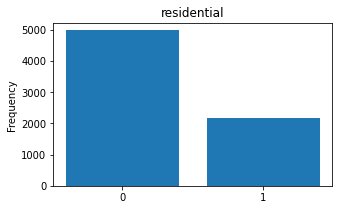

residential /n 0    4973
1    2186
Name: residential, dtype: int64


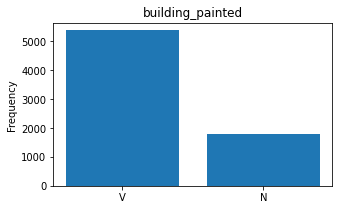

building_painted /n V    5381
N    1778
Name: building_painted, dtype: int64


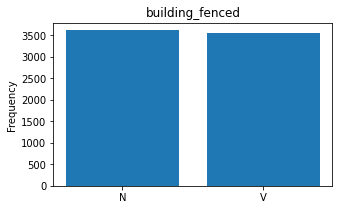

building_fenced /n N    3608
V    3551
Name: building_fenced, dtype: int64


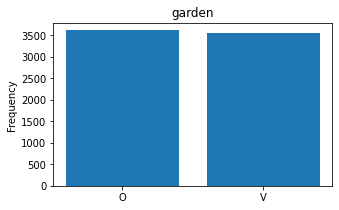

garden /n O    3609
V    3550
Name: garden, dtype: int64


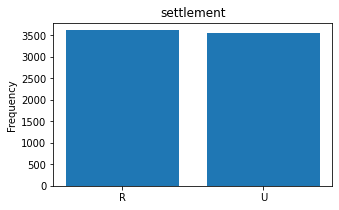

settlement /n R    3609
U    3550
Name: settlement, dtype: int64


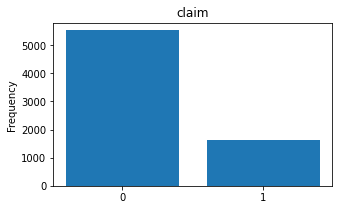

claim /n 0    5525
1    1634
Name: claim, dtype: int64


In [ ]:
category1 = ['residential',
       'building_painted', 'building_fenced', 'garden', 'settlement', 'claim']
for ka in category1:
    ba_plot(ka)

> -Out of the  buildings we have 4973 buindings that are residential, these are the buildings that have been occupied while 2187 buildings are not occupied. 

-Of all the buildings we have 5382 that are painted while 1778 buildings are not painted. Most of the insured buildings are painted. 

-Of all the insured building 3608 are fenced while 3552 are not fenced. 

-For all the buildings we have 3602 buildings with gardens 3551 with no gardens and 7 buildings are unknown. 

-For all the insured buildings we had no claim for 5526 buildings and 1634 buildings with at least one clain over the insured period. 

-Of the buildings we had 3610 settlements in Rural areas and 3550 buildings in the urban areas. There is very little difference in building settlements.

##### Numerical Variables

In [ ]:
# Ploting numeric varaibles

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_copy[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

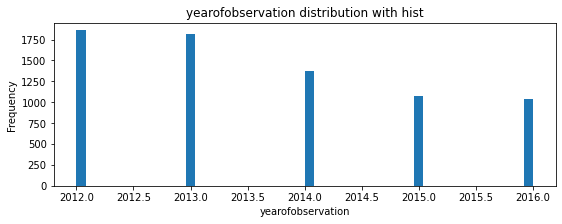

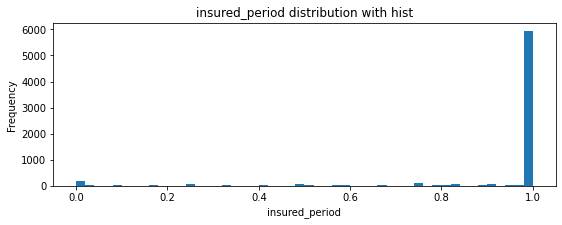

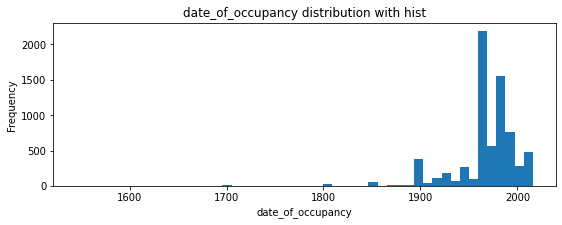

In [ ]:
numericVar = ['yearofobservation', 'insured_period', 'date_of_occupancy']
for n in numericVar:
  plot_hist(n)

> -For the years under which we had an observation we had 2012 and 2013 with the highest observation, while the least observations were made in 2015 and 2016. 

-Most of the building owners prefered an insuarance period of one year while few chose to insure their buiding in monthly terms.

-In terms of occupation, most of the buildings were occupied late 1900's and early 2000's.

#### Test Dataset

In [ ]:
test_copy.describe()

,yearofobservation,insured_period,residential,building_dimension,building_type,date_of_occupancy
count,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000
mean,2013.592110,0.922757,0.223671,1664.503750,2.359309,1967.533094
std,1.371208,0.219129,0.416772,2247.405065,0.998048,22.636002
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1750.000000
25%,2012.000000,1.000000,0.000000,477.000000,2.000000,1960.000000
50%,2013.000000,1.000000,0.000000,900.000000,2.000000,1968.000000
75%,2015.000000,1.000000,0.000000,1948.500000,3.000000,1980.000000
max,2016.000000,1.000000,1.000000,30745.000000,4.000000,2012.000000


##### Test Categorical Variables

In [ ]:
def ba_plot(variable):
    """
        input: variable ex: " "
        output: bar plot & value count
    
    """
    # get feature
    var = test_copy[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    
    # visualize
    plt.figure(figsize = (5,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{} /n {}".format(variable,varValue))

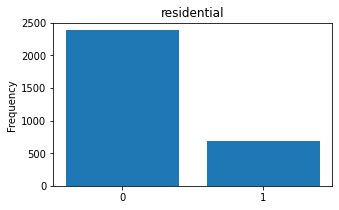

residential /n 0    2381
1     686
Name: residential, dtype: int64


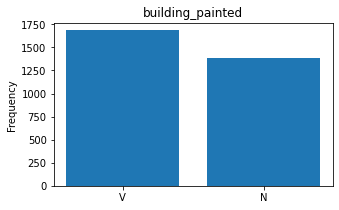

building_painted /n V    1683
N    1384
Name: building_painted, dtype: int64


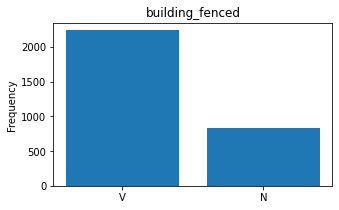

building_fenced /n V    2238
N     829
Name: building_fenced, dtype: int64


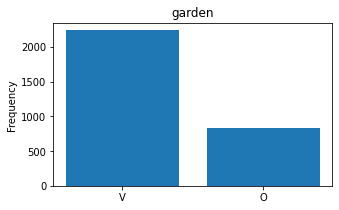

garden /n V    2238
O     829
Name: garden, dtype: int64


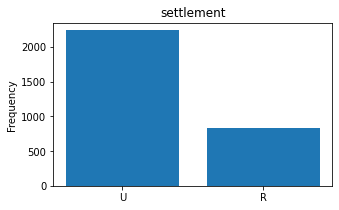

settlement /n U    2238
R     829
Name: settlement, dtype: int64


In [ ]:
category1 = ['residential',
       'building_painted', 'building_fenced', 'garden', 'settlement']
for ka in category1:
    ba_plot(ka)

-Out of the whole buildings we have residential 2381 buindings that are residential, these are the buildings that have been occupied while 688 buildings are not occupied. 

-Of all the buildings we have 1684 that are painted while 1385 buildings are not painted. Most of the insured buildings are painted.

-Of all the insured buildings 2240 are fenced while 829 are not fenced. 

-For all the buildings we have 825 buildings with gardens 4 with no gardens and 7 buildings are unknown. 

-Of the buildings we had 2240 settlements in Rural areas and 829 buildings in the urban areas. There is very little difference in building settlements.

##### Test Numeric Variables

In [ ]:
# Ploting numeric varaibles

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_copy[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

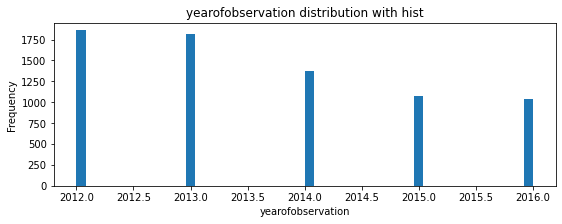

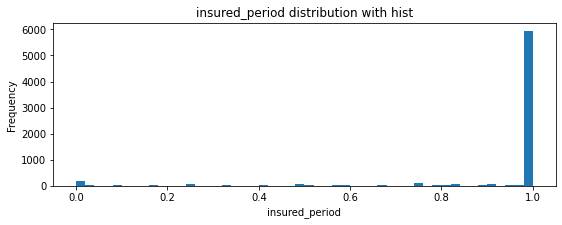

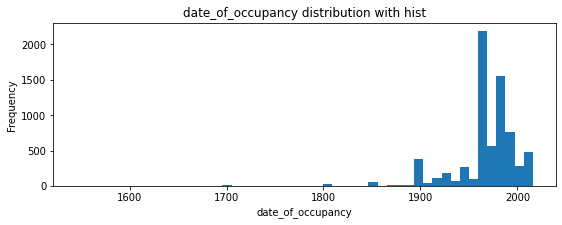

In [ ]:
numericVar = ['yearofobservation', 'insured_period', 'date_of_occupancy']
for n in numericVar:
  plot_hist(n)

-For the years under which we had an observation we had 2012 and 2013 with the highest observation, while the least observations were made in 2015 and 2016. 

-Most of the building owners prefered an insurance period of one year while few chose to insure their building in monthly terms. 

-In terms of occupation, most of the buildings were occupied late 1900's and early 2000's.

##Bivariate

#### Categorical Analysis

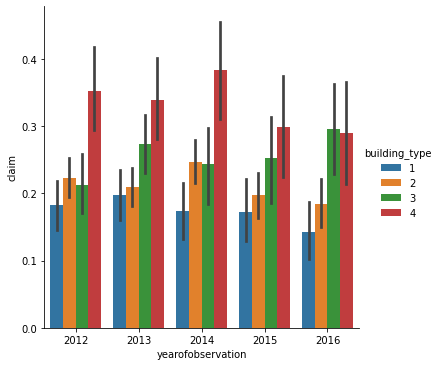

In [ ]:
sns.catplot(x="yearofobservation", y="claim", hue="building_type", kind="bar", data=training)

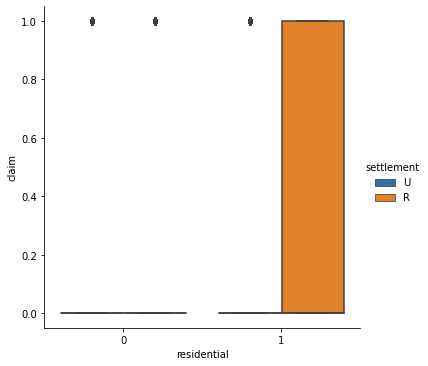

In [ ]:
sns.catplot(x="residential", y="claim", hue="settlement", kind="box", data=training)

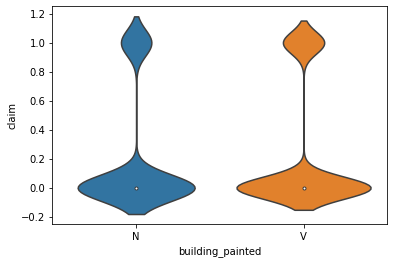

In [ ]:
sns.violinplot(x=training.building_painted, y=training.claim)

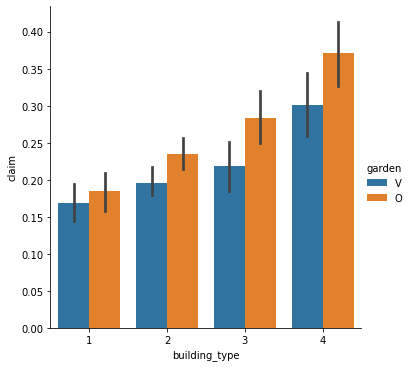

In [ ]:
sns.catplot(x="building_type", y="claim", hue="garden", kind="bar", data=training)

In [ ]:
# Selecting one year for further analysis 
select1 = training[training['yearofobservation']==2012]
select1['claim'].value_counts() 

# Selecting the next year for further analysis 
select2 = training[training['yearofobservation']== 2013]
select2['claim'].value_counts()

# Selecting the next year for further analysis 
select3 = training[training['yearofobservation']== 2014]
select3['claim'].value_counts()

# Selecting the next year for further analysis 
select4 = training[training['yearofobservation']== 2015]
select4['claim'].value_counts()

# Selecting the next year for further analysis 
select5 = training[training['yearofobservation']== 2016]
select5['claim'].value_counts()

0    828
1    215
Name: claim, dtype: int64

Text(0.5, 1.0, 'Number of claims in 2012')
Text(0.5, 1.0, 'Number of claims in 2013 ')
Text(0.5, 1.0, 'Number of claims in 2014')
Text(0.5, 1.0, 'Proportion of claims in 2015')
Text(0.5, 1.0, 'Proportion of claims in 2016')


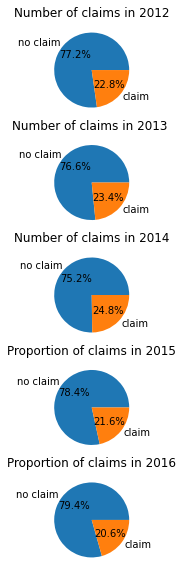

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(20,10)) #ax1,ax2 refer to your two pies

# # 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

labels = ['no claim','claim']
values = select1['claim'].value_counts() 
ax1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Number of claims in 2012')
print(ax1.title)



labels = ['no claim','claim']
values = select2['claim'].value_counts()
ax2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Number of claims in 2013 ')
print(ax2.title)

labels = ['no claim','claim']
values = select3['claim'].value_counts()
ax3.pie(values,labels = labels,autopct = '%1.1f%%') #plot third pie
ax3.set_title('Number of claims in 2014')
print(ax3.title)

labels = ['no claim','claim']
values = select4['claim'].value_counts()
ax4.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax4.set_title('Proportion of claims in 2015')
print(ax4.title)

labels = ['no claim','claim']
values = select5['claim'].value_counts()
ax5.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax5.set_title('Proportion of claims in 2016')
print(ax5.title)

#### Numerical Analysis 

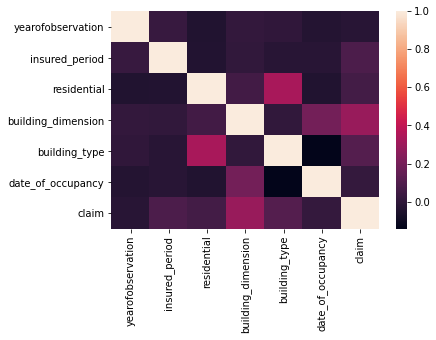

In [ ]:
sns.heatmap(training.corr())

-When the value of the correlation coefficient is close to zero, generally between -0.1 and +0.1, the variables are said to have no linear relationship or a very weak linear relationship. 

-Correlation coefficients between -.20 and .20 are generally considered weak, between .20 and .50 (positive or negative) are considered moderate, 
and above .50 (positive or negative) are considered strong.

-As observed, there is weak or barely any linear relationships between the variables.

-However, the outstanding observations are that:
i)Dimension and claim seem to have a higher correlation value than the rest.

ii)Building type and residential also appear to have a higher correlation than the other values.

iii)building type and date of occupancy have the least correlation value.

##Multivariate

###a)PCA

In [ ]:
#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

F = training.drop('claim', axis=1)

F = pd.get_dummies(F)

train_features = F

model = PCA(n_components=10).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = F.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,building_dimension
1,PC1,date_of_occupancy
2,PC2,yearofobservation
3,PC3,yearofobservation
4,PC4,building_type
5,PC5,building_painted_N
6,PC6,residential
7,PC7,insured_period
8,PC8,geo_code_6088
9,PC9,geo_code_33063


###b)LDA

In [ ]:
X = training.drop(['claim'], axis=1)
y = training['claim']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 0 to 7159
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yearofobservation   7159 non-null   int64  
 1   insured_period      7159 non-null   float64
 2   residential         7159 non-null   int64  
 3   building_painted    7159 non-null   object 
 4   building_fenced     7159 non-null   object 
 5   garden              7159 non-null   object 
 6   settlement          7159 non-null   object 
 7   building_dimension  7159 non-null   float64
 8   building_type       7159 non-null   int64  
 9   date_of_occupancy   7159 non-null   float64
 10  geo_code            7159 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 991.2+ KB


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X.building_painted = le.fit_transform(X.building_painted)
X.building_fenced = le.fit_transform(X.building_fenced)
X.garden = le.fit_transform(X.garden)
X.settlement = le.fit_transform(X.settlement)
X.geo_code = le.fit_transform(X.geo_code)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 0 to 7159
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yearofobservation   7159 non-null   int64  
 1   insured_period      7159 non-null   float64
 2   residential         7159 non-null   int64  
 3   building_painted    7159 non-null   int64  
 4   building_fenced     7159 non-null   int64  
 5   garden              7159 non-null   int64  
 6   settlement          7159 non-null   int64  
 7   building_dimension  7159 non-null   float64
 8   building_type       7159 non-null   int64  
 9   date_of_occupancy   7159 non-null   float64
 10  geo_code            7159 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 991.2 KB


In [ ]:
# X = pd.get_dummies(X)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#standardise the data

#initialise it
lda = LDA()

lda_= lda.fit(X, y)
lda_feat = lda_.transform(X)

#show co-efficients of the columns
lda_.coef_

array([[-4.42972166e-02,  9.94465666e-01,  7.49000859e-02,
         9.15108708e-02,  5.01543295e+00, -2.49003601e+00,
        -2.49003601e+00,  3.51189730e-04,  2.89583586e-01,
        -1.87115711e-03,  5.94009352e-05]])

In [ ]:
feat_matters = pd.DataFrame(index=X.columns.values, data = lda_.coef_[0].T)
feat_matters.sort_values(0, ascending =False)

,0
building_fenced,5.015433
insured_period,0.994466
building_type,0.289584
building_painted,0.091511
residential,0.074900
building_dimension,0.000351
geo_code,0.000059
date_of_occupancy,-0.001871
yearofobservation,-0.044297
settlement,-2.490036


# Feature Engineering

In [ ]:
training.head()

,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,geo_code,claim
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,1053,0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,1053,0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,1053,0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,1053,0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,1053,0


In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 0 to 7159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yearofobservation   7159 non-null   int64  
 1   insured_period      7159 non-null   float64
 2   residential         7159 non-null   int64  
 3   building_painted    7159 non-null   object 
 4   building_fenced     7159 non-null   object 
 5   garden              7159 non-null   object 
 6   settlement          7159 non-null   object 
 7   building_dimension  7159 non-null   float64
 8   building_type       7159 non-null   int64  
 9   date_of_occupancy   7159 non-null   float64
 10  geo_code            7159 non-null   object 
 11  claim               7159 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.0+ MB


In [ ]:
# No of years building has been occupied before observation

training['years_occupied'] = training.yearofobservation - training.date_of_occupancy
training.head()

,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,geo_code,claim,years_occupied
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,1053,0,53.0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,1053,0,165.0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,1053,0,54.0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,1053,0,53.0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,1053,0,214.0


In [ ]:
# Since insurance premiums are paid yearly, a value of 1.0 means it's been renewed for the next year, whereas values
# less than 1 indicate the the current subscription is still running and will be expiring within 11 months.
# Therefore if >=1.0, 0 represents it's not expiring soon (within the financial year), whereas <1, 1 represents
# it's expiring within the financial year. 

def expiring_soon(period):
  if period >= 1.0:
    return 0
  else:
    return 1

training['expiring_soon'] = training['insured_period'].apply(lambda x: expiring_soon(x))
training.head()

,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,geo_code,claim,years_occupied,expiring_soon
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,1053,0,53.0,0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,1053,0,165.0,0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,1053,0,54.0,0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,1053,0,53.0,0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,1053,0,214.0,0


In [ ]:
# Let's do the same for the Test set

testing['years_occupied'] = testing.yearofobservation - testing.date_of_occupancy
testing.head()

,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,geo_code,years_occupied
0,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3310,53.0
1,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3310,56.0
2,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,3310,53.0
3,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3321,10.0
4,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3321,12.0


In [ ]:
testing['expiring_soon'] = testing['insured_period'].apply(lambda x: expiring_soon(x))
testing.head()

,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,geo_code,years_occupied,expiring_soon
0,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3310,53.0,0
1,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3310,56.0,1
2,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,3310,53.0,1
3,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3321,10.0,0
4,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3321,12.0,0


# Implementing the Solution 

## Modelling

### 80:20 Model Split

In [ ]:
# # Setting up our labels and features
X=training.drop(['claim'],1)
X=pd.get_dummies(X)
y=training.claim

# compare algorithms
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings(action = 'ignore')

# Spot Check Algorithms
def model_structures(test_size):
    # Splitting the data into training and test sets,
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  # Feature Scaling
  # 
  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  models = []
  models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
  models.append(('LDA', LinearDiscriminantAnalysis()))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('CART', DecisionTreeClassifier()))
  models.append(('RF', RandomForestClassifier()))
  models.append(('GBC', GradientBoostingClassifier()))
  models.append(('NB', GaussianNB()))
  models.append(('SVM', SVC(gamma='auto')))
  # evaluate each model in turn
  # evaluate each model in turn
  results = []
  names = []
  for name, model in models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

model_structures(0.2)

LR: 0.746640 (0.017957)
LDA: 0.717329 (0.144040)
KNN: 0.741049 (0.016726)
CART: 0.716083 (0.021831)
RF: 0.767771 (0.016708)
GBC: 0.788548 (0.017080)
NB: 0.336650 (0.016841)
SVM: 0.759036 (0.017243)


### 70:30 Model Split

In [ ]:
model_structures(0.3)

LR: 0.741571 (0.021279)
LDA: nan (nan)
KNN: 0.737775 (0.027949)
CART: 0.710439 (0.015246)
RF: 0.764916 (0.022069)
GBC: 0.788466 (0.020816)
NB: 0.343041 (0.021830)
SVM: 0.758334 (0.028842)


### 60:40 Model Split

In [ ]:
model_structures(0.4)

LR: 0.742709 (0.020061)
LDA: 0.754369 (0.034930)
KNN: 0.734338 (0.018769)
CART: 0.715022 (0.013714)
RF: 0.769269 (0.015421)
GBC: 0.790682 (0.020533)
NB: 0.346456 (0.014005)
SVM: 0.762042 (0.012701)


### Optimizing Random Forest

In [ ]:
# From the models above, the RF,GBC and SVM models seem to give the best most consistent results.
# We'll use RF due to it's slightly better accuracy than SVM and slightly better mean_squared_error consistency
# over the different models over GBC.

# Splitting the data into training and test sets,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
# 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,accuracy_score


# Model Instantiation
forest = RandomForestClassifier(random_state = 42)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


# MSE and R2 score for train
print('Test MSE is:',np.sqrt(mean_squared_error(y_test,y_pred))) 
print('Test R2 Score is:',r2_score(y_test, y_pred))


print('The accuracy score is:',accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Test MSE is: 0.48367194200825164
Test R2 Score is: -0.3053783044667273
The accuracy score is: 0.7660614525139665


array([[1033,   64],
       [ 271,   64]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1097
           1       0.50      0.19      0.28       335

    accuracy                           0.77      1432
   macro avg       0.65      0.57      0.57      1432
weighted avg       0.72      0.77      0.72      1432



In [ ]:
# Checking for the most important features that contribute most in predicting the target
#
df_important = pd.DataFrame({'feature': X.columns, 'importance': np.round(forest.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
df_important.head(10)

,importance
feature,
building_dimension,0.2188
years_occupied,0.1006
yearofobservation,0.0650
date_of_occupancy,0.0615
insured_period,0.0320
building_type,0.0279
residential,0.0132
expiring_soon,0.0127
building_painted_V,0.0068


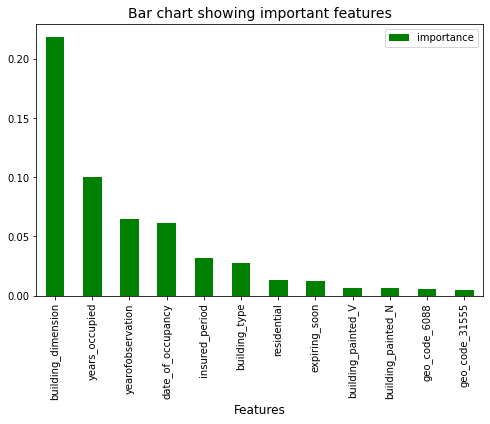

In [ ]:
# Creating a bar chart of feature importance in descending order
#
df_impor = df_important[:12].sort_values(by = 'importance', ascending = False)
df_impor.plot(kind = 'bar', figsize = (8, 5), color = 'green')
plt.legend(loc = 'top right')
plt.title('Bar chart showing important features', fontsize = 14)
plt.xlabel('Features', fontsize = 12)
plt.show()

In [ ]:
# model with important features
X=X[['building_dimension','years_occupied','yearofobservation','date_of_occupancy','insured_period','building_type',
     'residential','expiring_soon','building_painted_V','building_painted_N','geo_code_6088','geo_code_31555']]
y=training.claim
# Splitting the data into training and test sets,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
# 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Model Instantiation
forest = RandomForestClassifier(random_state = 42)
forest = forest.fit(X_train, y_train)


# Predict based on the model we've trained
y_pred = forest.predict(X_test)


# MSE and R2 score for train
print('Test MSE is:',np.sqrt(mean_squared_error(y_test,y_pred))) 
print('Test R2 Score is:',r2_score(y_test, y_pred))


print('The accuracy score is:',accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Test MSE is: 0.49860139586177177
Test R2 Score is: -0.38720798922434296
The accuracy score is: 0.7513966480446927


array([[983, 114],
       [242,  93]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1097
           1       0.45      0.28      0.34       335

    accuracy                           0.75      1432
   macro avg       0.63      0.59      0.59      1432
weighted avg       0.72      0.75      0.73      1432



In [ ]:
# To try improve the scores, we could try and improve the imbalance of the classes as
# indicated by the lower support values of class 1 in all models.

# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros, 

x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 5525, 1: 1634})
Resample dataset shape Counter({0: 5525, 1: 5525})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.20, random_state= 10)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Model Instantiation
forest = RandomForestClassifier(random_state = 42)
forest = forest.fit(X_train, y_train)


# Predict based on the model we've trained
y_pred = forest.predict(X_test)


# MSE and R2 score for train
print('Test MSE is:',np.sqrt(mean_squared_error(y_test,y_pred))) 
print('Test R2 Score is:',r2_score(y_test, y_pred))


print('The accuracy score is:',accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Test MSE is: 0.3376790626042233
Test R2 Score is: 0.5432626067787268
The accuracy score is: 0.885972850678733


array([[ 936,  210],
       [  42, 1022]])

In [ ]:
# The f1 score has increseas to it's highest value, and so has the accuracy.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      1146
           1       0.83      0.96      0.89      1064

    accuracy                           0.89      2210
   macro avg       0.89      0.89      0.89      2210
weighted avg       0.90      0.89      0.89      2210



### Hyperparameter Tuning

In [ ]:
# Creating a dictionary of parameters to tune
#

n_estimators = list(range(1,100))
max_depth = list(range(1,10))
#Convert to dictionary
params = dict(n_estimators=n_estimators, max_depth=max_depth)
# params = {'n_estimators': [10, 20, 30, 50, 100],
#          'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'accuracy', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(x_ros, y_ros)

# Checking for the best parameters
#
print('The best parameters are:',search.best_params_)

The best parameters are: {'max_depth': 9, 'n_estimators': 67}


In [ ]:
# model with the best parameters
# 
# Model Instantiation
forest = RandomForestClassifier(random_state = 42,max_depth=9, n_estimators=67)
forest = forest.fit(X_train, y_train)


# Predict based on the model we've trained
y_pred = forest.predict(X_test)


# MSE and R2 score for train
print('Test MSE is:',np.sqrt(mean_squared_error(y_test,y_pred))) 
print('Test R2 Score is:',r2_score(y_test, y_pred))


print('The accuracy score is:',accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Test MSE is: 0.5309429842164672
Test R2 Score is: -0.1291563332414809
The accuracy score is: 0.7180995475113122


array([[882, 264],
       [359, 705]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1146
           1       0.73      0.66      0.69      1064

    accuracy                           0.72      2210
   macro avg       0.72      0.72      0.72      2210
weighted avg       0.72      0.72      0.72      2210



### Final Model

In [ ]:
# The hyperparameter tuning model was worse and could be due to the 
# searching process for the best parameters that are multidimensional.
# We'll therefore use the Optiized model with random oversampling using the
# most important features.

# model with important features
X=X[['building_dimension','years_occupied','yearofobservation','date_of_occupancy','insured_period','building_type',
     'residential','expiring_soon']]
y=training.claim

ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros, 

x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 5525, 1: 1634})
Resample dataset shape Counter({0: 5525, 1: 5525})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.20, random_state= 10)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Instantiation
forest = RandomForestClassifier(random_state = 42)
forest = forest.fit(X_train, y_train)


# Predict based on the model we've trained
y_pred = forest.predict(X_test)


# MSE and R2 score for train
print('Test MSE is:',np.sqrt(mean_squared_error(y_test,y_pred))) 
print('Test R2 Score is:',r2_score(y_test, y_pred))


print('The accuracy score is:',accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Test MSE is: 0.34431386292029403
Test R2 Score is: 0.5251381070477239
The accuracy score is: 0.881447963800905


array([[ 935,  211],
       [  51, 1013]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1146
           1       0.83      0.95      0.89      1064

    accuracy                           0.88      2210
   macro avg       0.89      0.88      0.88      2210
weighted avg       0.89      0.88      0.88      2210



In [ ]:
import pickle
pickle.dump(forest, open('model.pkl', 'wb'))

### Predicting the Test dataset

In [ ]:
final=testing.copy(deep=True)
final=pd.get_dummies(final)
final= final[['building_dimension','years_occupied','yearofobservation','date_of_occupancy','insured_period','building_type',
              'residential','expiring_soon']]
final.head()

,building_dimension,years_occupied,yearofobservation,date_of_occupancy,insured_period,building_type,residential,expiring_soon
0,300.0,53.0,2013,1960.0,1.000000,1,0,0
1,300.0,56.0,2016,1960.0,0.997268,1,0,1
2,790.0,53.0,2013,1960.0,0.369863,1,0,1
3,1405.0,10.0,2014,2004.0,1.000000,1,0,0
4,1405.0,12.0,2016,2004.0,1.000000,1,0,0


In [ ]:
predicts = pd.Series(forest.predict(final), name='claim')
predicts.nunique()

2

In [ ]:
# customer_Id = test['Customer Id']
test_copy['predicted_claim'] = forest.predict(final)
test_copy.head()

,yearofobservation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,numberofwindows,geo_code,predicted_claim
0,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310,1
1,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310,1
2,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310,1
3,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321,1
4,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321,1


In [ ]:
#result = pd.concat([customer_Id, predicts], axis=1)
#result
test_copy.predicted_claim.value_counts()

1    2480
0     587
Name: predicted_claim, dtype: int64

# Challenging the Solution

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.constraints import maxnorm
from keras import layers
from numpy.random import seed
import tensorflow as tf

# splitting
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=.2,random_state=0)

input_dim = X.shape[1]
print(input_dim)

# Normalizing the our training data

# Initialize the scaler
scaler = StandardScaler()

# Fitting the scaler
scaler.fit(X_train)

# Applying the transformation to the data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
# Function to create model, required for KerasClassifier
 
def create_model(act,drop,weight,opt):
    # default values
    seed = 42
    tf.random.set_seed(seed)

    activation= act # 'relu'   or linear
    dropout_rate= drop # 0.0 # or 0.2
    init_mode='uniform'
    weight_constraint= weight #0 or  4
    optimizer= opt # 'adam' or SGD
    lr = 0.01
    momemntum=0
    # create model
    model = Sequential()
    model.add(Dense(8, 
                    input_dim=input_dim, kernel_initializer=init_mode, 
                    activation=activation,
                    kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model)

In [ ]:
model = create_model('sigmoid',0.0,0,'SGD')
print(model.summary())

In [ ]:
# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# RECOMMENDATIONS




The model was able to predict the test data, however we were not able to confirm the accuracy since the target variable ‘claim’ was not available on it. The solution was challenged by the Simple Neural Network model, which performed the worst. However, due to the initial close performance of the SVM and Gradient Boosting Classifier models to the Random Forest, further projects can be employed to run them on the data and predictions made on the test sets, to see how they eventually perform after Optimizations and hyperparameter tuning as compared to our final Random Forest model.

---

# Follow up questions

## a). Did we have the right data?

Yes, because we were able to get an accuracy above 85% with our model

## b). Do we need other data to answer our question? 

Yes, to confirm our predictions on the testing dataset, we could have used a 'claim' column on it, that was missing.

## c). Did we have the right question? 

Yes, because the higher the rate of insurance claims, the lower the profits of the insurance company

# Conclusion

In conclusion, the success criteria was adhered to and the objectives were met.

The project was a success.